In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("ticks")

In [7]:
date = '20190716'
percentage = '0'
path_rel_mentions = f'../../data/director_mentions/slice_data/{percentage}'
path_top_mentions = f'../../data/director_mentions'

### Mentions in 2018 only

### Top directors

In [48]:
male_top_deadline = pd.read_csv(f'{path_top_mentions}/male_fame_top_deadline_20190707.txt', sep = ',',\
                               header = None, names = ['count', 'name'])
male_top_deadline = male_top_deadline.sort_values(by='count', ascending = False)
female_top_deadline = pd.read_csv(f'{path_top_mentions}/female_fame_top_deadline_20190707.txt', sep = ',',\
                               header = None, names = ['count', 'name'])

In [49]:
male_top_hollywood_reporter = pd.read_csv(f'{path_top_mentions}/male_fame_top_hollywood_reporter_20190707.txt', sep = ',',\
                               header = None, names = ['count', 'name'])
female_top_hollywood_reporter = pd.read_csv(f'{path_top_mentions}/female_fame_top_hollywood_reporter_20190707.txt', sep = ',',\
                               header = None, names = ['count', 'name'])

In [50]:
male_top_variety = pd.read_csv(f'{path_top_mentions}/male_fame_top_variety_20190707.txt', sep = ',',\
                               header = None, names = ['count', 'name'])
female_top_variety = pd.read_csv(f'{path_top_mentions}/female_fame_top_variety_20190707.txt', sep = ',',\
                               header = None, names = ['count', 'name'])

#### Deadline top

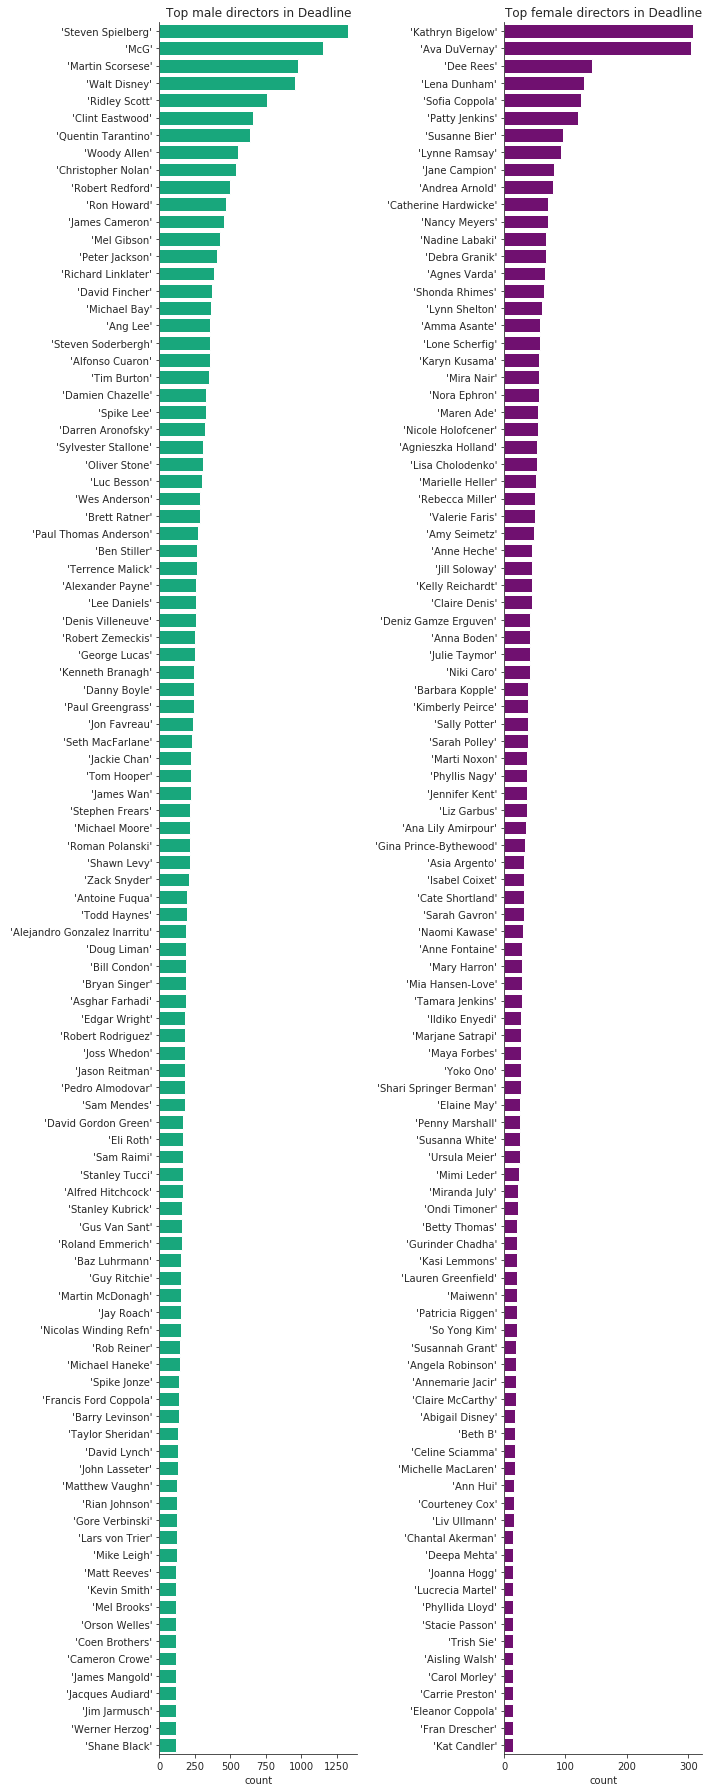

In [51]:
plt.figure(figsize=(10,25))

plt.subplot(1,2,1)
sns.barplot(x='count', y='name', data = male_top_deadline.head(100), color = '#00BF85')
plt.title('Top male directors in Deadline')
plt.ylabel(None)

plt.subplot(1,2,2)
sns.barplot(x='count', y='name', data = female_top_deadline.head(100), color = 'purple')
plt.title('Top female directors in Deadline')
plt.ylabel(None)

plt.tight_layout()
sns.despine()
plt.savefig('top_directors_deadline.png', dpi=300, format='png')
plt.show()

#### Variety top

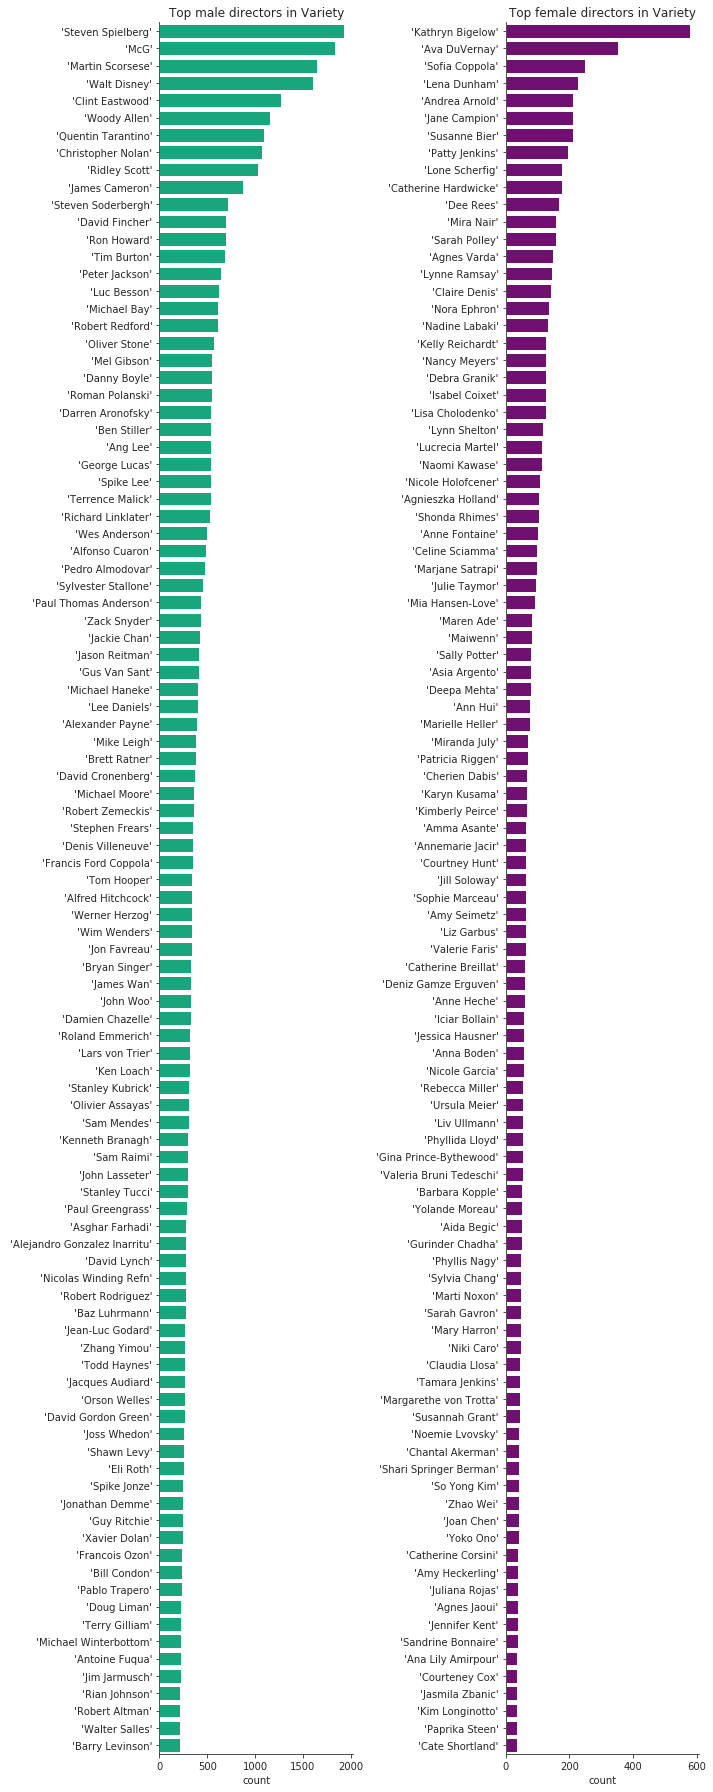

In [52]:
plt.figure(figsize=(10,25))

plt.subplot(1,2,1)
sns.barplot(x='count', y='name', data = male_top_variety.head(100), color = '#00BF85')
plt.title('Top male directors in Variety')
plt.ylabel(None)

plt.subplot(1,2,2)
sns.barplot(x='count', y='name', data = female_top_variety.head(100), color = 'purple')
plt.title('Top female directors in Variety')
plt.ylabel(None)

plt.tight_layout()
sns.despine()
plt.savefig('top_directors_variety.png', dpi=300, format='png')
plt.show()

#### Hollywood reporter top

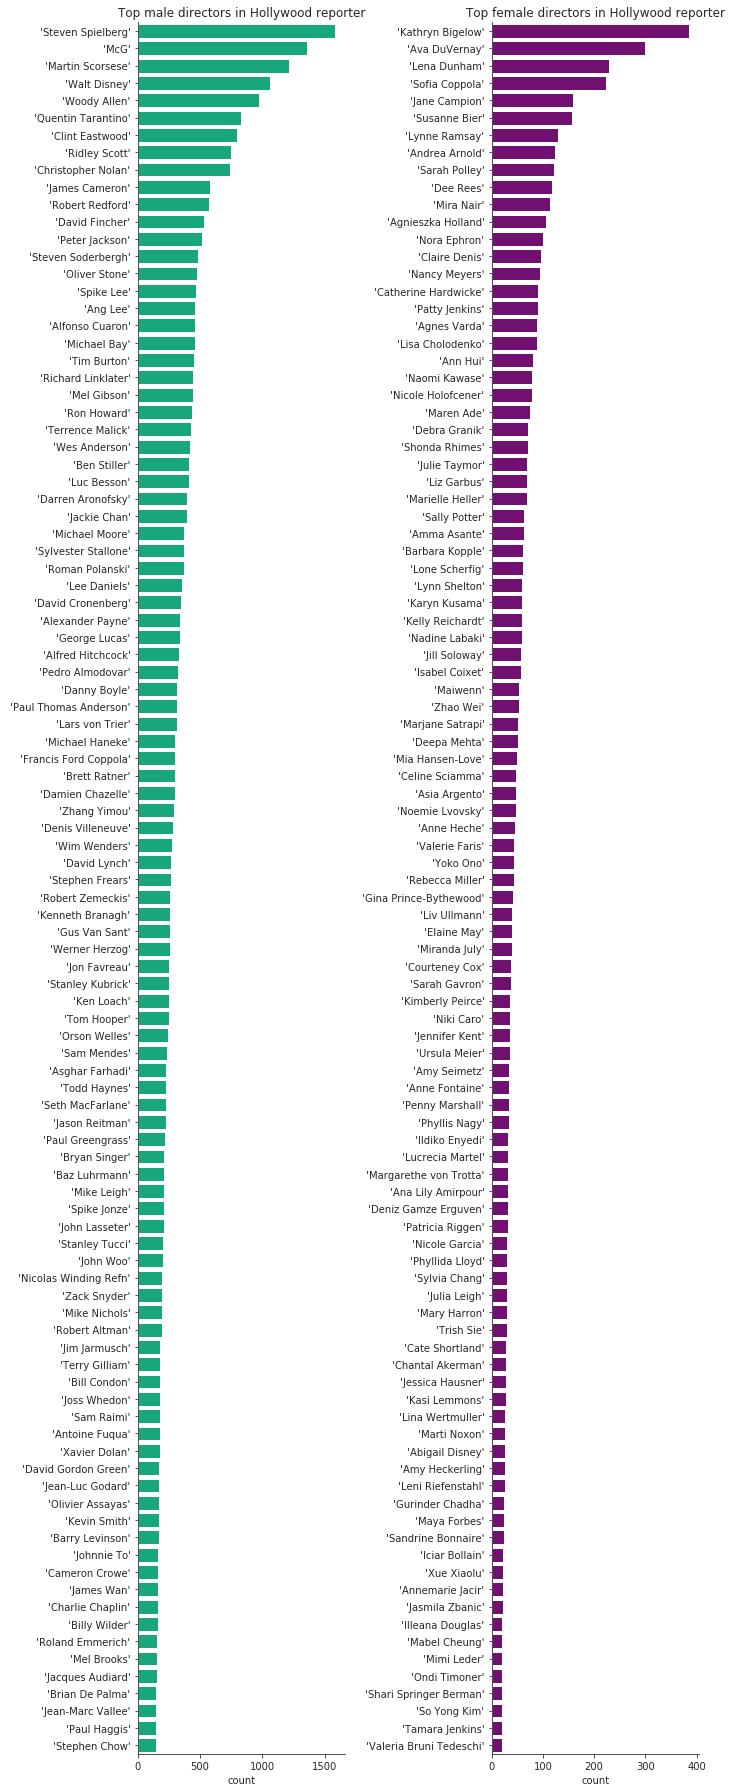

In [53]:
plt.figure(figsize=(10,25))

plt.subplot(1,2,1)
sns.barplot(x='count', y='name', data = male_top_hollywood_reporter.head(100), color = '#00BF85')
plt.title('Top male directors in Hollywood reporter')
plt.ylabel(None)

plt.subplot(1,2,2)
sns.barplot(x='count', y='name', data = female_top_hollywood_reporter.head(100), color = 'purple')
plt.title('Top female directors in Hollywood reporter')
plt.ylabel(None)

plt.tight_layout()
sns.despine()
plt.savefig('top_directors_hollywood_reporter.png', dpi=300, format='png')
plt.show()

# Relative mention per year

In [29]:
female_deadline_month = pd.read_csv(f'{path_rel_mentions}/female_mentions_per_month_deadline_{date}.txt', sep = ' ', header = None, names = ['year', 'month', 'count'])
female_deadline_month['date'] = female_deadline_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
female_deadline_month = female_deadline_month.sort_values(by='date')
female_deadline_month['date'] = female_deadline_month['date'].apply(lambda x: str(x.year)+'-'+str(x.month))

male_deadline_month = pd.read_csv(f'{path_rel_mentions}/male_mentions_per_month_deadline_{date}.txt', sep = ' ', header = None, names = ['year', 'month', 'count'])
male_deadline_month['date'] = male_deadline_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
male_deadline_month = male_deadline_month.sort_values(by='date')
male_deadline_month['date'] = male_deadline_month['date'].apply(lambda x: str(x.year)+'-'+str(x.month))

deadline_month = male_deadline_month.merge(female_deadline_month, on = 'date', suffixes = ('_male', '_female'))
deadline_month['total'] = deadline_month.apply(lambda x: x[2] + x[-1], axis = 1)

In [30]:
female_hwr_month = pd.read_csv(f'{path_rel_mentions}/female_mentions_per_month_hollywood_reporter_{date}.txt', sep=' ', header = None, names = ['year', 'month', 'count'])
female_hwr_month['date'] = female_hwr_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
female_hwr_month = female_hwr_month.sort_values(by='date')
female_hwr_month['date'] = female_hwr_month['date'].apply(lambda x: str(x.year)+'-'+str(x.month))

male_hwr_month = pd.read_csv(f'{path_rel_mentions}/male_mentions_per_month_hollywood_reporter_{date}.txt', sep=' ', header = None, names = ['year', 'month', 'count'])
male_hwr_month['date'] = male_hwr_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
male_hwr_month = male_hwr_month.sort_values(by='date')
male_hwr_month['date'] = male_hwr_month['date'].apply(lambda x: str(x.year)+'-'+str(x.month))

hwr_month = male_hwr_month.merge(female_hwr_month, on = 'date', suffixes = ('_male', '_female'))
hwr_month['total'] = hwr_month.apply(lambda x: x[2] + x[-1], axis = 1)

In [31]:
female_variety_month = pd.read_csv(f'{path_rel_mentions}/female_mentions_per_month_variety_{date}.txt', sep=' ', header = None, names = ['year', 'month', 'count'])
female_variety_month['date'] = female_variety_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
female_variety_month = female_variety_month.sort_values(by='date')
female_variety_month['date'] = female_variety_month['date'].apply(lambda x: str(x.year)+'-'+str(x.month))

male_variety_month = pd.read_csv(f'{path_rel_mentions}/male_mentions_per_month_variety_{date}.txt', sep=' ', header = None, names = ['year', 'month', 'count'])
male_variety_month['date'] = male_variety_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
male_variety_month = male_variety_month.sort_values(by='date')
male_variety_month['date'] = male_variety_month['date'].apply(lambda x: str(x.year)+'-'+str(x.month))

variety_month = male_variety_month.merge(female_variety_month, on = 'date', suffixes = ('_male', '_female'))
variety_month['total'] = variety_month.apply(lambda x: x[2] + x[-1], axis = 1)

In [34]:
deadline_year = deadline_month.groupby(['year_male'], as_index=False).sum()#[1:]
hwr_year = hwr_month.groupby(['year_male'], as_index=False).sum()#[3:]
variety_year = variety_month.groupby(['year_male'], as_index=False).sum()#[3:]

deadline_year['fem_year_relative'] = deadline_year.apply(lambda x: x[5]/x[6], axis = 1)
deadline_year['male_year_relative'] = deadline_year.apply(lambda x: x[2]/x[6], axis = 1)

variety_year['fem_year_relative'] = variety_year.apply(lambda x: x[5]/x[6], axis = 1)
variety_year['male_year_relative'] = variety_year.apply(lambda x: x[2]/x[6], axis = 1)

hwr_year['fem_year_relative'] = hwr_year.apply(lambda x: x[5]/x[6], axis = 1)
hwr_year['male_year_relative'] = hwr_year.apply(lambda x: x[2]/x[6], axis = 1)

deadline_year
#variety_year
#hwr_year

,year_male,month_male,count_male,year_female,month_female,count_female,total,fem_year_relative,male_year_relative
0,2010,49,627,10050,49,77,704,0.109375,0.890625
1,2011,78,3603,24132,78,346,3949,0.087617,0.912383
2,2012,78,5009,24144,78,603,5612,0.107448,0.892552
3,2013,78,5653,24156,78,641,6294,0.101843,0.898157
4,2014,78,5267,24168,78,548,5815,0.094239,0.905761
5,2015,78,5240,24180,78,685,5925,0.115612,0.884388
6,2016,78,5657,24192,78,807,6464,0.124845,0.875155
7,2017,78,5966,24204,78,1036,7002,0.147958,0.852042
8,2018,78,5454,24216,78,1267,6721,0.188514,0.811486


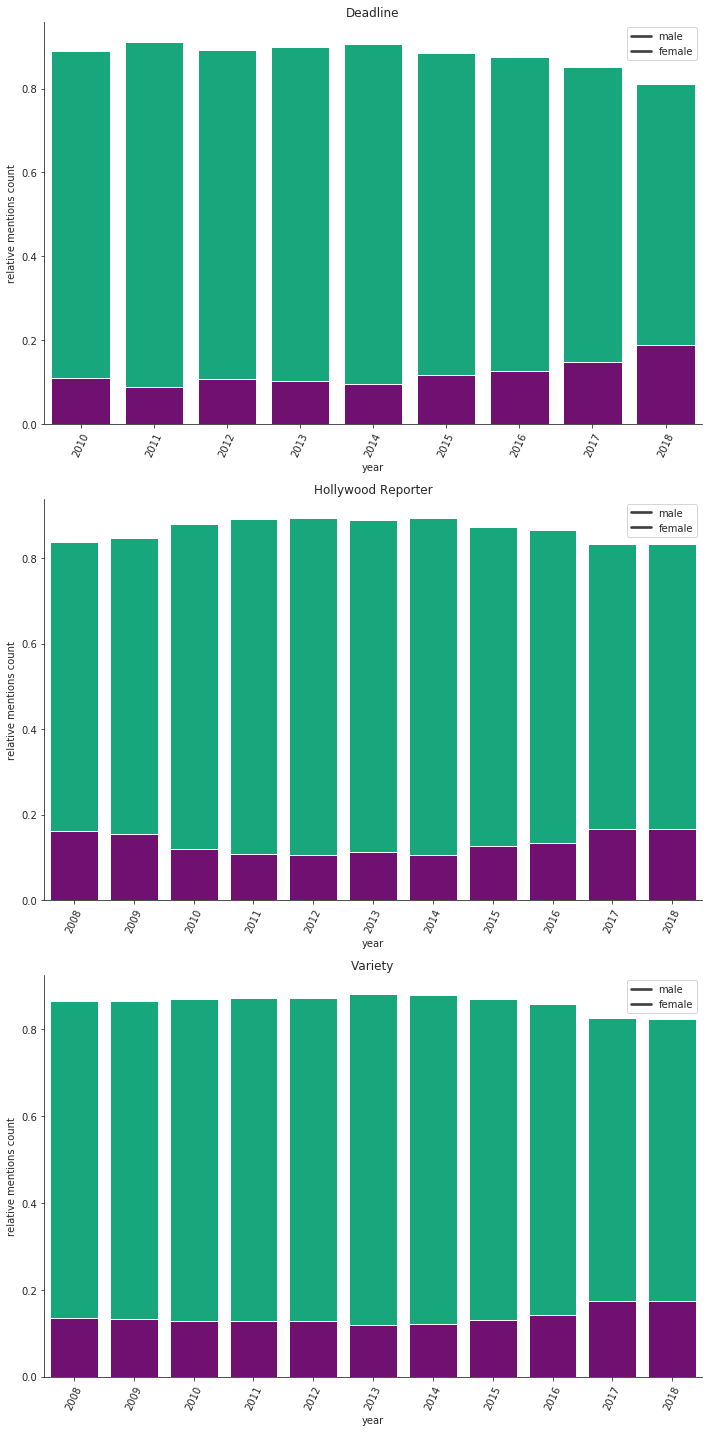

In [35]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
ax = sns.barplot(x='year_male', y='male_year_relative', data = deadline_year.groupby(['year_male'], as_index=False).sum(), color = '#00BF85')
ax = sns.barplot(x='year_male', y='fem_year_relative', data = deadline_year.groupby(['year_male'], as_index=False).sum(), color = 'purple')
ax.set(xlabel='year', ylabel='relative mentions count')
plt.title('Deadline')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)

plt.subplot(3,1,2)
sns.barplot(x='year_male', y='male_year_relative', data = hwr_year.groupby(['year_male'], as_index=False).sum(), color = '#00BF85')
ax = sns.barplot(x='year_male', y='fem_year_relative', data = hwr_year.groupby(['year_male'], as_index=False).sum(), color = 'purple')
ax.set(xlabel='year', ylabel='relative mentions count')
plt.title('Hollywood Reporter')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)

plt.subplot(3,1,3)
sns.barplot(x='year_male', y='male_year_relative', data = variety_year.groupby(['year_male'], as_index=False).sum(), color = '#00BF85')
ax = sns.barplot(x='year_male', y='fem_year_relative', data = variety_year.groupby(['year_male'], as_index=False).sum(), color = 'purple')
ax.set(xlabel='year', ylabel='relative mentions count')
plt.title('Variety')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'mentions_year_barchart_relative.png', dpi=300, format='png')
plt.show()

In [36]:
cut_deadline_month = deadline_month.loc[deadline_month['year_male']>=2011]
cut_hwr_month = hwr_month.loc[hwr_month['year_male']>=2011]
cut_variety_month = variety_month.loc[variety_month['year_male']>=2011]

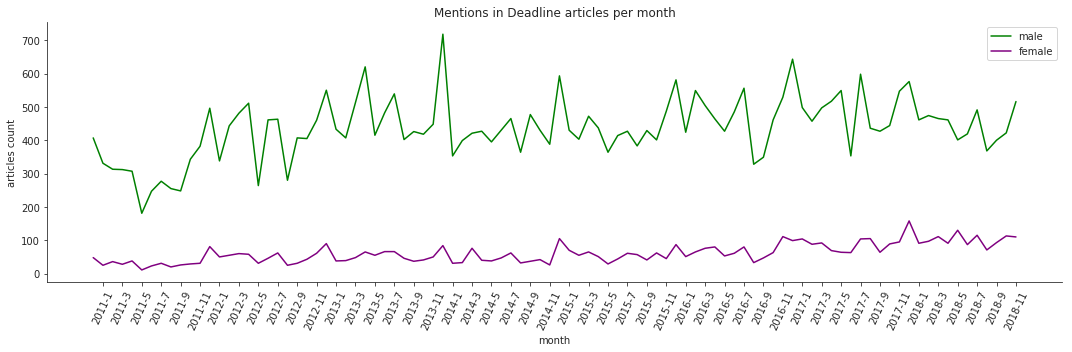

In [37]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_male', data = cut_deadline_month, color = 'green')
ax = sns.lineplot(x='date', y='count_female', data = cut_deadline_month, color = 'purple')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Deadline articles per month')
plt.legend(('male', 'female'))
plt.xticks(np.arange(1, len(cut_deadline_month['date'].tolist()), 2), cut_deadline_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'deadline_mentions_per_month_male_female.png', dpi=300, format='png')
plt.show()

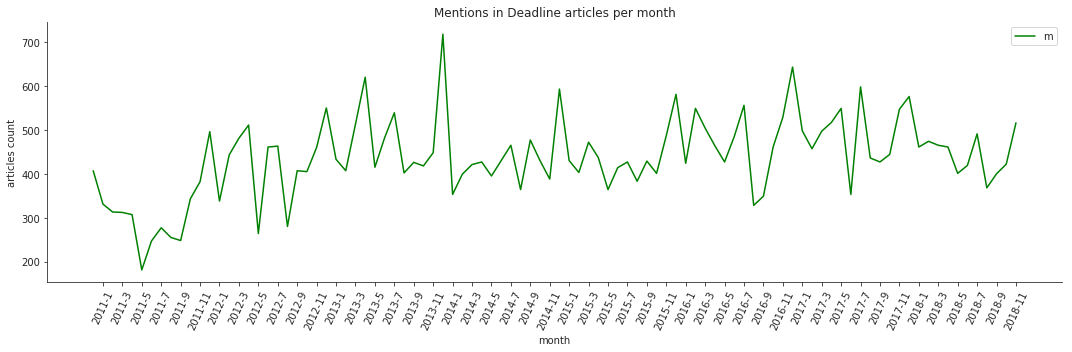

In [38]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_male', data = cut_deadline_month, color = 'green')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Deadline articles per month')
plt.legend(('male'))
plt.xticks(np.arange(1, len(cut_deadline_month['date'].tolist()), 2), cut_deadline_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'deadline_mentions_per_month_male.png', dpi=300, format='png')
plt.show()

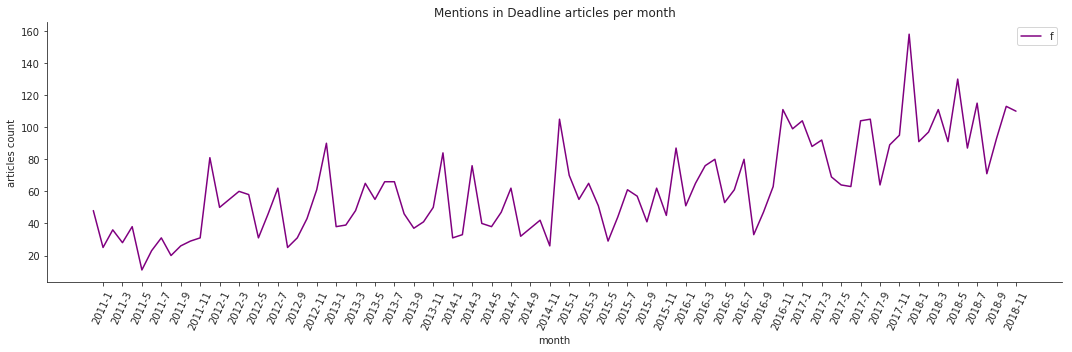

In [39]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_female', data = cut_deadline_month, color = 'purple')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Deadline articles per month')
plt.legend(('female'))
plt.xticks(np.arange(1, len(cut_deadline_month['date'].tolist()), 2), cut_deadline_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'deadline_mentions_per_month_female.png', dpi=300, format='png')
plt.show()

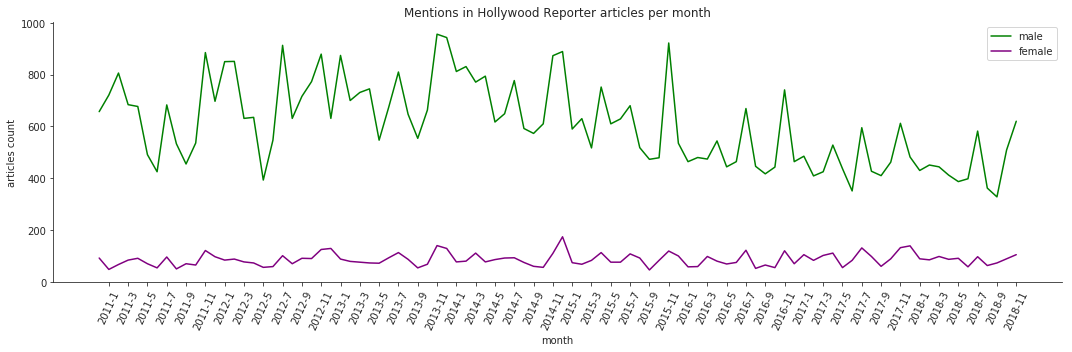

In [40]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_male', data = cut_hwr_month, color = 'green')
ax = sns.lineplot(x='date', y='count_female', data = cut_hwr_month, color = 'purple')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Hollywood Reporter articles per month')
plt.legend(('male', 'female'))
plt.xticks(np.arange(1, len(cut_hwr_month['date'].tolist()), 2), cut_hwr_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'hwr_mentions_per_month_male_female.png', dpi=300, format='png')
plt.show()

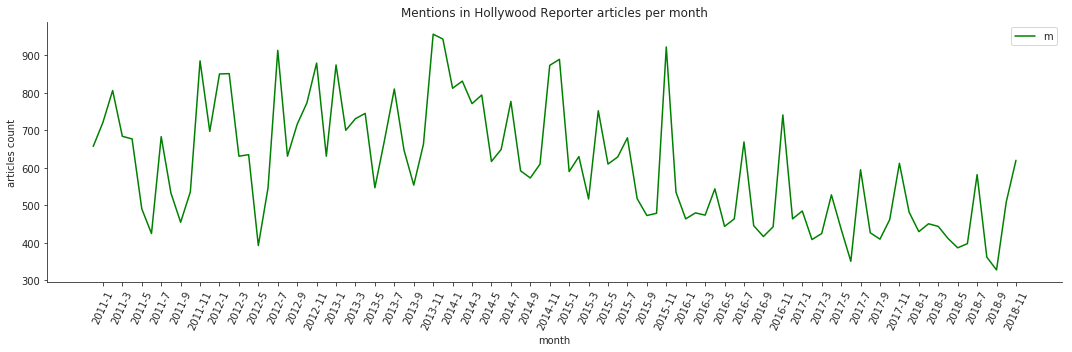

In [41]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_male', data = cut_hwr_month, color = 'green')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Hollywood Reporter articles per month')
plt.legend(('male'))
plt.xticks(np.arange(1, len(cut_hwr_month['date'].tolist()), 2), cut_hwr_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'hwr_mentions_per_month_male.png', dpi=300, format='png')
plt.show()

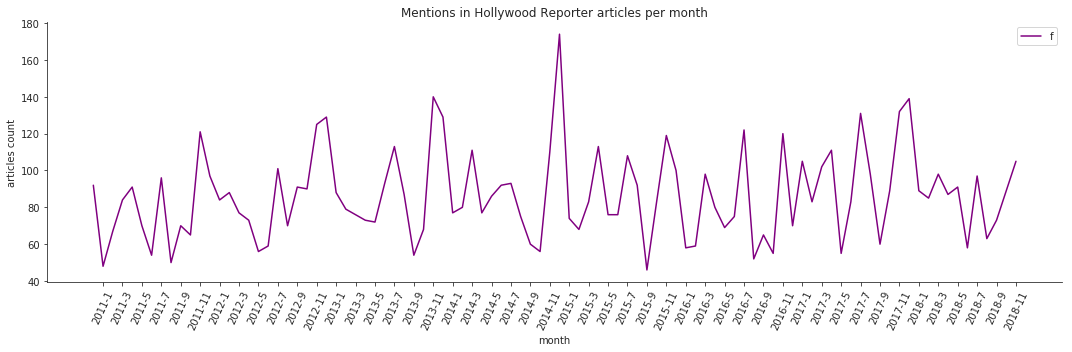

In [42]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_female', data = cut_hwr_month, color = 'purple')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Hollywood Reporter articles per month')
plt.legend(('female'))
plt.xticks(np.arange(1, len(cut_hwr_month['date'].tolist()), 2), cut_hwr_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'hwr_mentions_per_month_female.png', dpi=300, format='png')
plt.show()

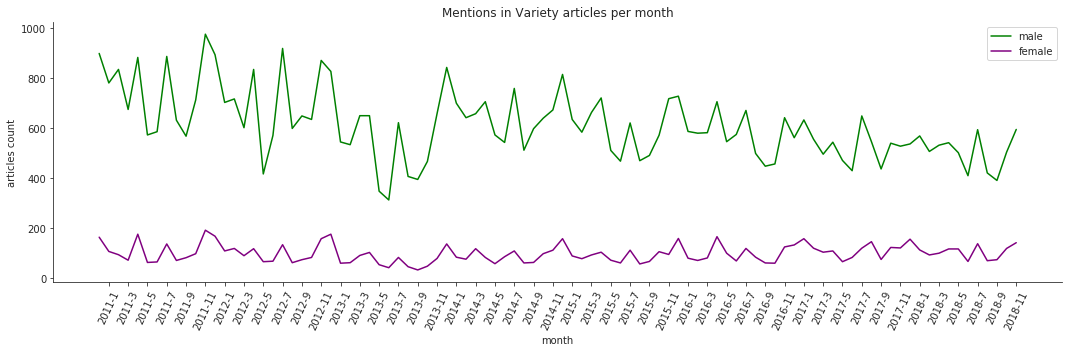

In [43]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_male', data = cut_variety_month, color = 'green')
ax = sns.lineplot(x='date', y='count_female', data = cut_variety_month, color = 'purple')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Variety articles per month')
plt.legend(('male', 'female'))
plt.xticks(np.arange(1, len(cut_variety_month['date'].tolist()), 2), cut_variety_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'variety_mentions_per_month_male_female.png', dpi=300, format='png')
plt.show()

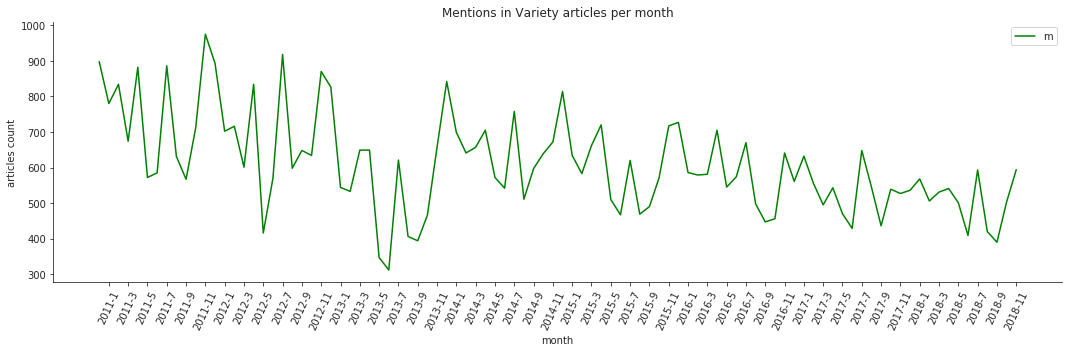

In [44]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_male', data = cut_variety_month, color = 'green')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Variety articles per month')
plt.legend(('male'))
plt.xticks(np.arange(1, len(cut_variety_month['date'].tolist()), 2), cut_variety_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'variety_mentions_per_month_male.png', dpi=300, format='png')
plt.show()

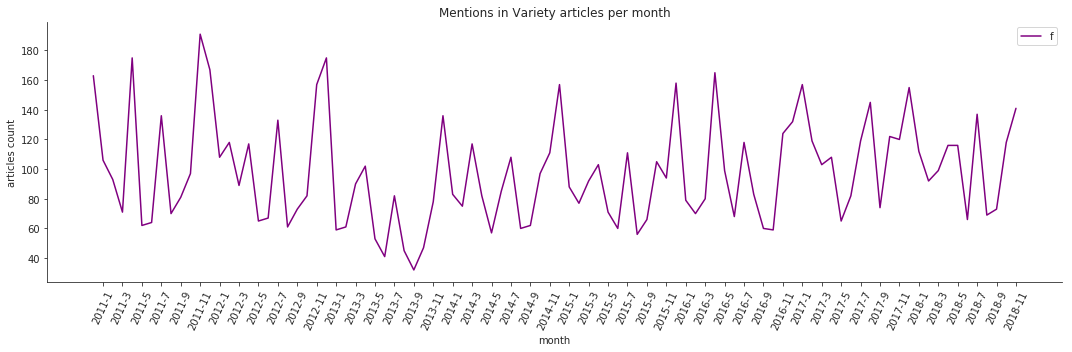

In [45]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_female', data = cut_variety_month, color = 'purple')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Variety articles per month')
plt.legend(('female'))
plt.xticks(np.arange(1, len(cut_variety_month['date'].tolist()), 2), cut_variety_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'variety_mentions_per_month_female.png', dpi=300, format='png')
plt.show()